# Data Preparation and Training
In this assignment you are going to learn how to enrich a dataset using another dataset, split dataset into training and testing sets, and train some regression models.

#### **Let's get Started!**


# Data Ingestion

For this assignment we will work with The movies dataset.

The Movies dataset: The Movies Dataset contains metadata for 45,000 movies. It includes features such as movie titles, genres, directors, and user-ratings. The dataset also contains information about the actors, writers, and producers associated with each movie.

This dataset is based upon Full MovieLens Dataset and also contains links to movies from TMDB and IMDB, for a subset of movies. The dataset offers a rich source of information for analyzing and understanding the world of cinema!

You can download the dataset from Kaggle, [here](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data?select=movies_metadata.csv).

Remeber? The csv file must exist in your own local Colab environment. For this you must upload the datafile and change the path if requried.

**Add the missing code!**

Make sure the variable `path_local` contains the correct path to the data.

In [1]:
# Start coding here
path_local = '/example/path/to/file.csv'
# End coding here

**Add the missing code!**

Load the csv-file with the read_csv function from Pandas. Add the right arguments to the function. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) to see the documentation of read_csv.

In [2]:
import pandas as pd

# Start coding here
movies = pd.read_csv(path_local)
# End coding here


C:\Users\matbree\AppData\Local\Temp\ipykernel_15868\381792344.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(path_local)


Use the `tail` function to have a look at the trailing rows of the dataset. We're using the `transpose` function to rearrange the rows and columns, so that we can have a look at the data horizontally.

In [3]:
movies.tail().transpose()

,45461,45462,45463,45464,45465
adult,False,False,False,False,False
belongs_to_collection,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,0
genres,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[{'id': 18, 'name': 'Drama'}]","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",[],[]
homepage,http://www.imdb.com/title/tt6209470/,NaN,NaN,NaN,NaN
id,439050,111109,67758,227506,461257
imdb_id,tt6209470,tt2028550,tt0303758,tt0008536,tt6980792
original_language,fa,tl,en,en,en
original_title,رگ خواب,Siglo ng Pagluluwal,Betrayal,Satana likuyushchiy,Queerama
overview,Rising and falling between a man and woman.,An artist struggles to finish his work while a...,"When one of her hits goes wrong, a professiona...","In a small town live two brothers, one a minis...",50 years after decriminalisation of homosexual...


## Import important libraries

**Scikit-learn** is a powerful library in Python for machine learning. It provides a wide range of algorithms for classification, regression, clustering, and other tasks. One of the most commonly used algorithms in scikit-learn is Linear Regression (LR). LR is a simple yet powerful method for predicting continuous outcomes based on one or more input features.

Click [here](https://scikit-learn.org/stable/modules/classes.html) to explore the APIs for Scikit-learn.

In [4]:

%matplotlib inline
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import KFold, cross_val_predict

#Set sns params
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)


Print and see which columns/features exist in the dataset. You can see there are some interesting data like language, budget, genres, popularity, country, and so much more!

In [5]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Look at the shape to see how many features are present.

In [6]:
movies.shape

(45466, 24)

**Add the missing code!**

Print out a quick summary of the important information about your dataframe. If you forgot, no problem! check last weeks notebook.

In [7]:
# Start coding here
movies.info()
# End coding here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

**Add the missing code!**

Similary, Can you print out the number of unique values for every column in your dataframe. You can always refer to the previous notebooks to refresh your memory.

In [8]:
# Start coding here
movies.nunique()
# End coding here

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

Let's also add the year column derived from the date.

We're using `to_datetime` function to convert our year column into a date type.

Also notice that we're using the `apply` function which is used to iterate over the year object, and then apply the user defined `lambda` function. `lambda` function is like any other function which can be created anonymously to be passed into other functions, or be used in an inline fashion like used below.


In [9]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

Now, since we've added a new column to our dataset, we must check if that actually happens.

**Add the missing code!**

Can you recall a function to check the number of rows and columns in a dataset?

In [10]:
# Start coding here
movies.shape
# End coding here

(45466, 25)

**Which are the costliest Movies to make?**

Let's have a look at the budget column, and compare it with other features like title, revenue, return, and year.

In [11]:
movies[movies['budget'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,year
9247,Revolutionary Girl Utena: The Movie,998000,0.0,1999
39203,Life Feels Good,996519,0.0,2013
11609,Kidulthood,994000,165000.0,2006
34215,The Peanuts Movie,99000000,246233113.0,2015
39688,Don't Breathe,9900000,157100845.0,2016
39842,Friend Request,9900000,2400000.0,2016
39793,Elle,9804690,2341534.0,2016
30179,BMX Bandits,980385,0.0,1983
14,Cutthroat Island,98000000,10017322.0,1995
4142,The Mummy Returns,98000000,433013274.0,2001


**Which are the longest Movies?**

Let's have a look at the runtime column, and compare it with other features like title and year. The `sort_values` function is used to re-arrange the rows such that the highest values are at the start.

In [12]:
movies[movies['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
40938,1140.0,Baseball,1994
19965,1140.0,Jazz,2001
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


**Assignment task - Try it yourself!**

In a similar manner, can you find out which are the least popular movies, and analyze in which year were they released?

In [13]:
# Start coding here
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies[movies['popularity'] > 0][['popularity', 'title', 'year']].sort_values('popularity', ascending=False).tail(10)
# End coding here

,popularity,title,year
31504,0.000001,Breaking the Silence,1992
14539,0.000001,Tango,1981
39686,0.000001,Color Adjustment,1992
42074,0.000001,The Third Prince,1982
15960,0.000001,The Moth,1980
31172,0.000001,The Guy From Harlem,1977
34238,0.000001,Homebodies,1974
18048,0.000001,The Carpenter,1988
42278,0.000001,Return Home,1990
28498,0.000001,A Blank on the Map,1971


**Word Cloud** is a popular data visualization technique used to represent text data as a colorful and visually appealing image. It works by taking a large amount of text data and condensing it into a smaller image that highlights the most important words or phrases, often using different sizes, colors, and shapes to represent their importance.

The resulting visualization provides a quick and easy way to understand the main themes and topics in the text data without having to read through it all.

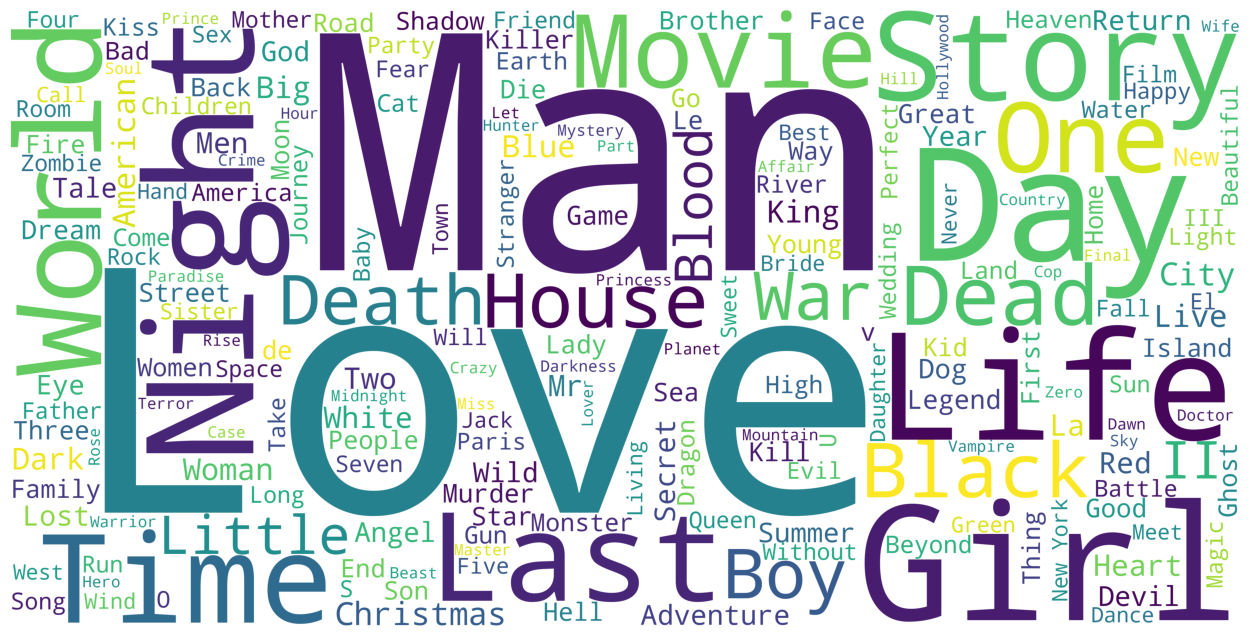

In [14]:
#Define dataframe for plotting
movies['title'] = movies['title'].astype('str')
title_corpus = ' '.join(movies['title'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Try it yourself!**

Create a wordcloud for another column! and try to see if you find any insightful trends!

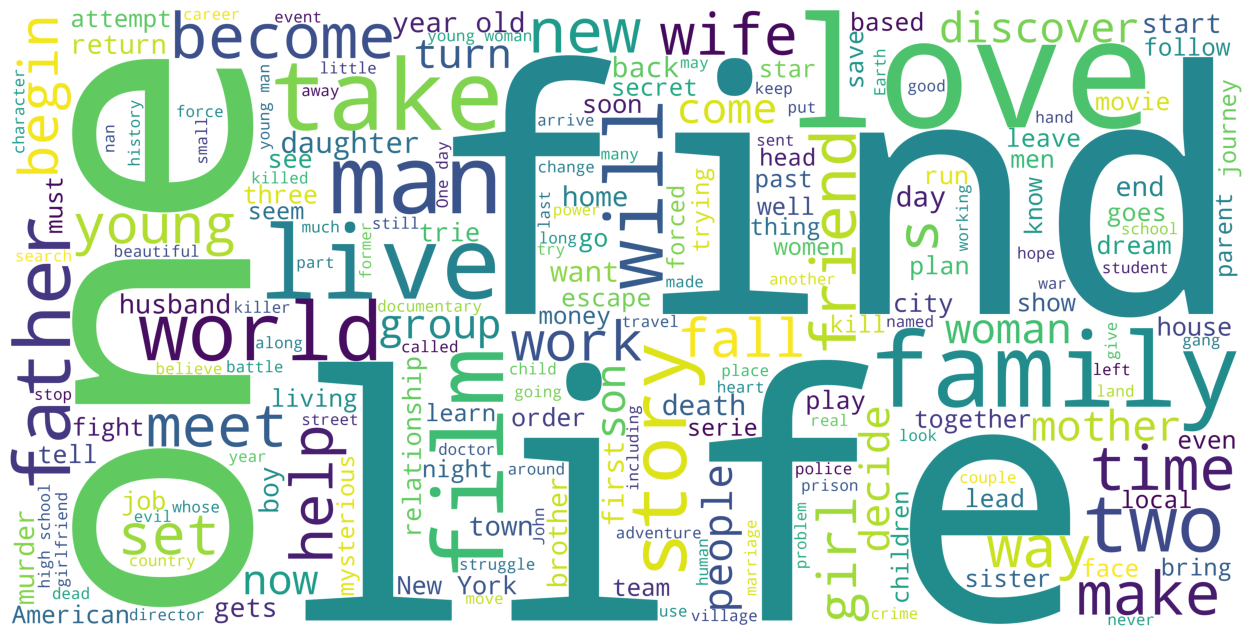

In [15]:
## start coding here
movies['overview'] = movies['overview'].astype('str')
title_corpus = ' '.join(movies['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

## end coding here

plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Data Enrichment - by adding new dataset

Let us now take a look at the cast and crew file from our movies dataset. We must already have a separate .csv file named *credits*, inside the folder where you downloaded the dataset.

**Add the missing code!**

Make sure the variable `path_credits` contains the correct path to the correct datafile.

In [16]:
# Start coding here
path_credits = '/example/path/to/credits.csv'
# End coding here

**Add the missing code!**

Load the csv-file with the read_csv function from Pandas. Add the right arguments to the function. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) to see the documentation of read_csv.


In [17]:
# Start coding here
credits = pd.read_csv(path_credits)
credits.shape
# End coding here

(45476, 3)

Let's see if the data got loaded in the dataframe successfully, and see how the values look like.

In [18]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


## Preprocess Movies dataset
To process the 'id' column of movies into integer type, we're using the `to_numeric` pandas funciton. We've defined the error value as `coerce` parameter which sets the invalid parameters to Nan.

This is being done so that the Movies dataset can be gradually merged with the Credits dataset.

In [19]:
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

Lwt's check and gradually remove if there are any NaN values in the dataset of the column id.

NaN's are typically used to clean your data by eliminating irrelevant rows or columns improving the quality and reliability of your analysis.

Here, its also important for easy merger with the credits dataset.

In [20]:
movies[movies['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaT
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaT
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaT


Drop the Nan values

In [21]:
movies['year'] = movies['year'].replace('NaT', np.nan)
movies.dropna(subset=['year'], inplace=True)

In [22]:
movies[movies['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year


For an easy merging of two datasets, its also important that both the key columns have the same datatype.

So, lets convert the datatypes into integers.

In [23]:
movies['id'] = movies['id'].astype('int')
credits['id'] = credits['id'].astype('int')

Merge the two datasets using the `merge` function!


In [24]:
movies = movies.merge(credits, on='id')
movies.shape

(45451, 27)

## Prepare dataset to predict the Revenue


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45451 non-null  object 
 1   belongs_to_collection  4497 non-null   object 
 2   budget                 45451 non-null  object 
 3   genres                 45451 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45451 non-null  int32  
 6   imdb_id                45437 non-null  object 
 7   original_language      45440 non-null  object 
 8   original_title         45451 non-null  object 
 9   overview               45451 non-null  object 
 10  popularity             45451 non-null  float64
 11  poster_path            45112 non-null  object 
 12  production_companies   45451 non-null  object 
 13  production_countries   45451 non-null  object 
 14  release_date           45451 non-null  object 
 15  re

Let's remove the columns/features we don't require for the model prection problem at hand.

In [26]:
if 'adult' in movies:
    movies = movies.drop(['adult'], axis=1)

movies = movies.drop(['id', 'video', 'crew','original_language', 'original_title','title', 'cast', 'belongs_to_collection', 'production_companies', 'production_countries','genres','homepage', 'imdb_id','spoken_languages' ], axis=1)


Replace irrelevent values with 0 revenue entries with Nan, and then drop all the NaN values.

In [27]:
movies['revenue'] = movies['revenue'].replace(0, np.nan)
movies['budget'] = movies['budget'].replace(0, np.nan)

movies.dropna(inplace=True)
movies

,budget,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,vote_average,vote_count,year
1,65000000,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,6.9,2413.0,1995
3,16000000,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,6.1,34.0,1995
4,0,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,5.7,173.0,1995
5,60000000,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,1995-12-15,187436818.0,170.0,Released,A Los Angeles Crime Saga,7.7,1886.0,1995
8,35000000,International action superstar Jean Claude Van...,5.231580,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,1995-12-22,64350171.0,106.0,Released,Terror goes into overtime.,5.5,174.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...
44813,0,The film explores the global power and impact ...,0.519968,/2yoyCL2GlxoNPdQ15MEZJQbUzIW.jpg,2017-04-14,393970.0,99.0,Released,The John Coltrane Documentary,8.0,2.0,2017
44835,260000000,"Autobots and Decepticons are at war, with huma...",39.186819,/s5HQf2Gb3lIO2cRcFwNL9sn1o1o.jpg,2017-06-21,604942143.0,149.0,Released,"For one world to live, the other must die.",6.2,1440.0,2017
45006,60000000,"The last Gunslinger, Roland Deschain, has been...",50.903593,/i9GUSgddIqrroubiLsvvMRYyRy0.jpg,2017-08-03,71000000.0,95.0,Released,There are other worlds than these,5.7,688.0,2017
45130,50000000,"Gene, a multi-expressional emoji, sets out on ...",33.694599,/f5pF4OYzh4wb1dYL2ARQNdqUsEZ.jpg,2017-07-28,66913939.0,86.0,Released,Not easy being meh,5.8,327.0,2017


**Add the missing code**

Can you drop the columns overview, poster_path, release_date, status, and tagline as well from the movie dataframe we're preparing?

In [28]:
# Start coding here
movies_prep = movies.drop(['overview', 'poster_path', 'release_date', 'status', 'tagline' ], axis=1)
# End coding here

In [29]:
movies_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5956 entries, 1 to 45157
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        5956 non-null   object 
 1   popularity    5956 non-null   float64
 2   revenue       5956 non-null   float64
 3   runtime       5956 non-null   float64
 4   vote_average  5956 non-null   float64
 5   vote_count    5956 non-null   float64
 6   year          5956 non-null   object 
dtypes: float64(5), object(2)
memory usage: 372.2+ KB


Let's create the final dataframe for prediction, and its shape. Don't forget to check if you missed to handle any null values!

In [30]:
revenue_prediction_df = movies_prep
print(revenue_prediction_df.shape)
revenue_prediction_df.isnull().values.any()

(5956, 7)


False

## Train-Test data split

Now, let's dive deeper into another module of scikit library which is `train_test_split` method. This method is used to split the data into training and testing sets. The purpose of this splitting is to evaluate how well your model will perform on unseen data (i.e., data it hasn't seen before). By doing so, you can get an idea of how accurate your model is likely to be when applied to real-world data.

The `train_test_split` method takes two arguments:

1. `X`: This is the input feature matrix that you want to split into training and testing sets.
2. `y`: This is the target or response variable that you want to predict using your model.

To read more about the train-test split module of sklean, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [31]:
from sklearn.model_selection import train_test_split

Let's split the data into training and testing tests.

In [32]:
X, y = revenue_prediction_df.drop('revenue', axis=1), revenue_prediction_df['revenue']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25)
train_X.shape

(4467, 6)

For a quality training and testing split, we'll be using K-Fold to split the dataset into training and testing sets instead.

## K-Fold split and validation

In Python's scikit-learn library, k-fold cross-validation is a technique used for model selection and evaluation. It involves dividing the data into k subsets or "folds", training the model on one fold while evaluating it on the remaining (k-1) folds. This process is repeated until all folds have been used.

This helps to reduce overfitting by averaging the performance across multiple iterations of the validation set.

Let's dive deeper and explore the `KFold` functionality!

In [33]:
from sklearn.model_selection import KFold

Lets split the dataset into 5 partitions.

In [34]:
kf_object =KFold(n_splits=5, shuffle=True, random_state=42)

Print the number of samples per data partition

In [35]:
count = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf_object.split(X, y):
    print(f'Fold:{count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count += 1

Fold:1, Train set: 4764, Test set:1192
Fold:2, Train set: 4765, Test set:1191
Fold:3, Train set: 4765, Test set:1191
Fold:4, Train set: 4765, Test set:1191
Fold:5, Train set: 4765, Test set:1191


# Data Modeling
## Linear Regression
Let's train a linear regression model for the prepared data.For that let's import the `LinearRegression` functionality provided by scikit-learn library.

Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) to read more about the sklearn API.


In [36]:
from sklearn.linear_model import LinearRegression

Lreg = LinearRegression()

The `cross_val_predict()` function in scikit-learn's (`sklearn`) API is used to predict the values of a target variable for a given dataset using k-fold cross-validation. It takes the trained model, the dataset, and the number of folds as input and returns the predicted values for each fold.

In [37]:
Lreg_pred = cross_val_predict(Lreg, X, y, cv= kf_object)

c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: Future

##Decision Tree Regression
Similar to Linear Regression, let's create another Regression model using sklearn API for the Decision Tree. Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to read more about it.

**Add the missing code**

Import the API for another model Decision Tree Regression from sklearn, and add your own model in the similar way as above.

Don't forget to define the cross-validation prediction function, while saving the scores for all k-folds of data!

In [38]:
# Start coding here

from sklearn.tree import DecisionTreeRegressor

DTreg = DecisionTreeRegressor()

DTreg_pred = cross_val_predict(DTreg, X, y, cv= kf_object)

# End coding here

c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: Future

## Evaluation Metrics



Let's import some required libraries for performing the evaluation.

We're using `sqrt` APi from numpy to calculate the square-root of a given number. The `metrics` library includes functions for calculating evaluation metrics such as mean absolute and squared error.


Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) to read and explore more about the modules being used.

In [39]:
from numpy import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

Let's first print the Mean squared error scores which were saved using K-fold validation.

In [40]:
print(f'MSE for Linear Regression model : {mean_squared_error(y,Lreg_pred)}')
print(f'MSE for Decision Tree Regression model : {mean_squared_error(y,DTreg_pred)}')

MSE for Linear Regression model : 7050210773485461.0
MSE for Decision Tree Regression model : 1.2532923561884162e+16


c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

Similarly, let's also print out the RMSE or the root mean squared error for evaluation.

In [41]:
print(f' RMSE for Linear Regression model : {sqrt(mean_squared_error(y,Lreg_pred))}')
print(f' RMSE for Decision Tree Regression model : {sqrt(mean_squared_error(y,DTreg_pred))}')

 RMSE for Linear Regression model : 83965533.24719293
 RMSE for Decision Tree Regression model : 111950540.69491653


c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

And lastely let's have a look at Mean Absolute error

In [42]:
print(f' Absolute mean for Linear Regression model : {mean_absolute_error(y,Lreg_pred)}')
print(f' Absolute mean for Decision Tree Regression model : {mean_absolute_error(y,DTreg_pred)}')

 Absolute mean for Linear Regression model : 44775518.679925315
 Absolute mean for Decision Tree Regression model : 52181150.10846206


c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

# Homework

For today's homework, we'll re-use the previous use-case, which was **Improving Customer Retention in the Telecommunications Industry**. So, the Objectives and Problem statement is already known to you. If not, go over them quickly again.

#### **Objective:**

The primary objective of this business case is to reduce customer churn and increase customer retention for a telecommunications company by leveraging customer data analysis and implementing targeted retention programs.

#### **Problem Statement:**

Customer churn, which refers to customers leaving the service within the last month, is a significant issue for the telecommunications industry. High customer churn rates can lead to revenue loss and increased acquisition costs. To address this problem, we need to understand the factors contributing to churn and develop strategies to retain customers effectively.

#### **Data Description:**

The dataset contains detailed information about each customer, including their service subscriptions, account details, and demographic information.
Relevant columns in the dataset include Churn (indicating whether a customer left in the last month), service subscriptions (phone, internet, etc.), customer account information (contract, payment method, monthly charges, total charges), and demographic data (gender, age range, partners, and dependents).

### **Assignment**

1. Now that you have explored the dataset, can you train a basic regression model to predict the Churn? USe the already explored features or variables you found would be effective on churn?

2. Try to clean and preprocess the data.

```
        Are you handling the Nan values well?
        Are you able to merge the demographic data well?
```


3.   Train some Regression models and see which one performs best.

```
        Implement K-Fold and see for which fold model performs better.
        Is there data-imbalance inferred from the folds?
        How does the evaluation metrics look like when compared to each other?
        
```

4.   Take a look at the sklearn documentation and explore the different techniques and models available. For a start, look over [KFold sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#) module, or [Linear Regression sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.

Happy exploring!


